<center><h2>Heat Equation</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez,  CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
<p>
EqHeat.py: solve heat equation

In [1]:
% matplotlib notebook

from numpy import *
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

Working, wait for figure after count to 30
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


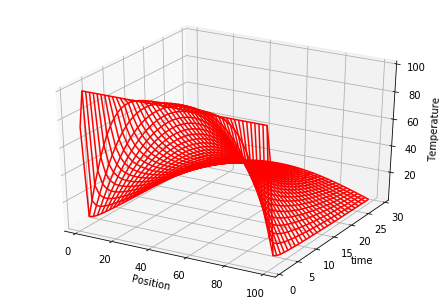

finished


In [2]:
Nx = 101;        Nt = 9000;     Dx = 0.01;     Dt = 0.3                                                              
KAPPA = 210.;    SPH = 900.;    RHO = 2700.   # conductivity, specific heat, density                                                      
T = zeros( (Nx, 2), float);  Tpl = zeros( (Nx, 31), float)  
                                     
print("Working, wait for figure after count to 30")

for ix in range (1, Nx - 1):  T[ix, 0] = 100.0;      # initial temp 
T[0,0] = 0.0 ;   T[0,1] = 0.          # first and last points at 0
T[Nx-1,0] = 0. ; T[Nx-1,1] = 0.0
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                                          
m = 1           # counter for rows, one every 300 time steps

for t in range (1, Nt):           # time iteration
    for ix in range (1, Nx - 1):                                   
        T[ix, 1] = T[ix, 0] +  cons*(T[ix + 1, 0] + T[ix - 1, 0] - 2.0*T[ix, 0])                                                        
    if t%300 == 0 or t == 1:     # for t = 1 & every 300 steps
        for ix in range (1, Nx - 1, 2): Tpl[ix, m] = T[ix, 1]   
        print(m)   
        m = m + 1           # increase m every 300 time steps
    for ix in range (1, Nx - 1):  T[ix, 0] = T[ix, 1]   # 100 positons at t=m
x = list(range(1, Nx - 1, 2))                           # plot every other x point
y = list(range(1, 30))                                  # every 10 times
X, Y = p.meshgrid(x, y)      # grid for position and time

def functz(Tpl):             # Function returns temperature
    z = Tpl[X, Y]       
    return z

Z = functz(Tpl)              
fig = p.figure()                                                      # create figure
ax = Axes3D(fig)                                                      # plots axis
ax.plot_wireframe(X, Y, Z, color = 'r')                               # red wireframe
ax.set_xlabel('Position')                                                # label axes
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                  # shows figure, close Python shell
print("finished")         